Author: Alexis Laignelet

Date: 06/09/19

# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import copy
from gradient_descent import SGLD

# 2D non-convex example

## Objective function

In [2]:
def obj(x, y):
    return (4 - 2.1*x**2 + x**4/3) * x**2 + x * y + (-4 + 4*y**2) * y**2

In [3]:
a = np.linspace(-2, 2, 100)
b = np.linspace(-2, 2, 100)

In [4]:
A, B = np.meshgrid(a, b)

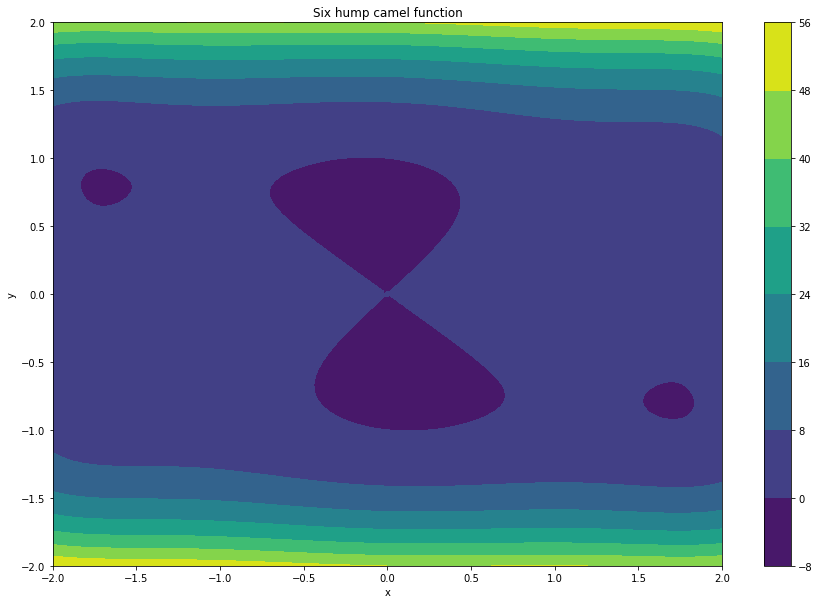

In [5]:
plt.figure(figsize=(15,10))
Z = obj(A, B)
cp = plt.contourf(A, B, Z)
plt.colorbar(cp)
plt.title('Six hump camel function')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

## Excplicit scheme

In [6]:
torch.manual_seed(3)
X = 4*torch.rand(2) - 2
X.requires_grad = True
lr = 1e-2
nb_iter = 100

In [7]:
optimizer = optim.SGD([X], lr)

In [8]:
train_loss = np.array([])
train_x = np.array([])
train_y = np.array([])
for it in range(nb_iter):
    optimizer.zero_grad()
    loss = obj(X[0], X[1])  
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_x = np.append(train_x, X[0].detach().numpy())
    train_y = np.append(train_y, X[1].detach().numpy())

    if it%10 == 0:
        print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))
    loss.backward()
    optimizer.step()

It: 0/100 | Loss: 2.148e+01
It: 10/100 | Loss: 2.170e+00
It: 20/100 | Loss: 2.111e+00
It: 30/100 | Loss: 2.105e+00
It: 40/100 | Loss: 2.104e+00
It: 50/100 | Loss: 2.104e+00
It: 60/100 | Loss: 2.104e+00
It: 70/100 | Loss: 2.104e+00
It: 80/100 | Loss: 2.104e+00
It: 90/100 | Loss: 2.104e+00


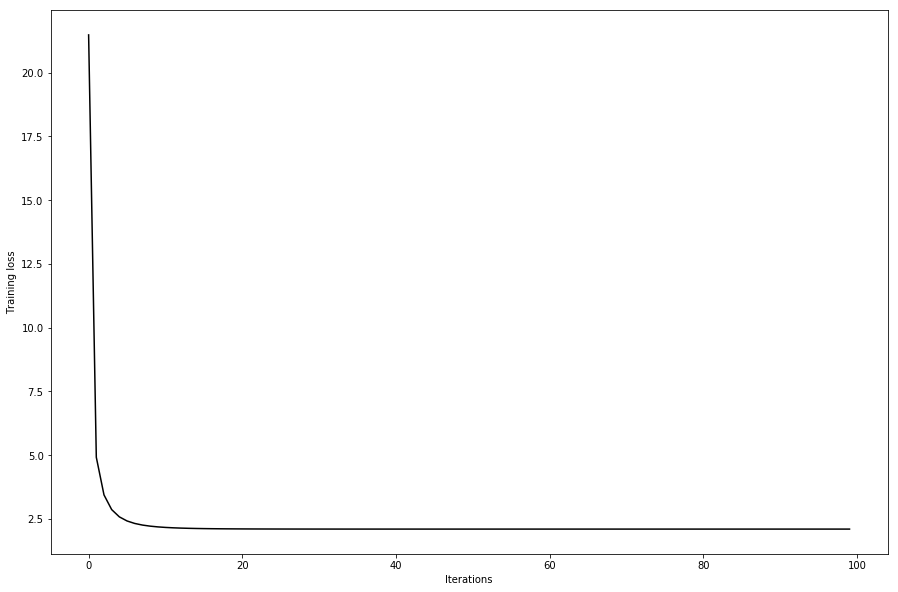

In [9]:
plt.figure(figsize=(15,10))
plt.plot(train_loss, color='black')
plt.xlabel('Iterations');
plt.ylabel('Training loss');

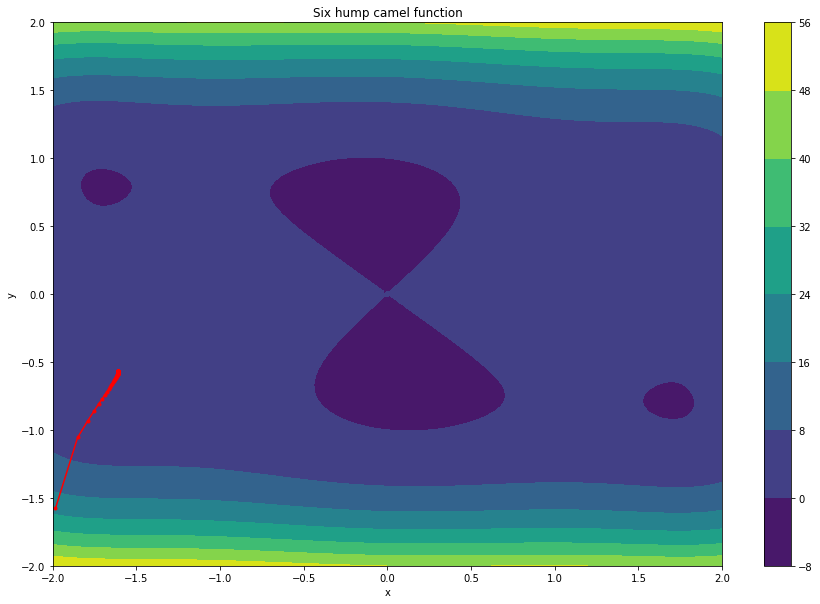

In [10]:
plt.figure(figsize=(15,10))
cp = plt.contourf(A, B, Z)
plt.plot(train_x, train_y, marker='.', color='red')
plt.colorbar(cp)
plt.title('Six hump camel function')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

## Explicit - SGLD

In [11]:
torch.manual_seed(3)
X = 4*torch.rand(2) - 2
X.requires_grad = True
lr = 1e-2
nb_iter = 100
beta = 1

In [12]:
optimizer = SGLD([X], lr, **{'beta':beta})

In [13]:
train_loss = np.array([])
train_x = np.array([])
train_y = np.array([])
for it in range(nb_iter):
    optimizer.zero_grad()
    loss = obj(X[0], X[1])  
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_x = np.append(train_x, X[0].detach().numpy())
    train_y = np.append(train_y, X[1].detach().numpy())

    if it%10 == 0:
        print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))
    loss.backward()
    optimizer.step()

It: 0/100 | Loss: 2.148e+01
It: 10/100 | Loss: 2.670e+00
It: 20/100 | Loss: 2.232e+00
It: 30/100 | Loss: -5.311e-02
It: 40/100 | Loss: 1.799e+00
It: 50/100 | Loss: 5.957e-01
It: 60/100 | Loss: -4.138e-01
It: 70/100 | Loss: -5.837e-01
It: 80/100 | Loss: -1.020e+00
It: 90/100 | Loss: -2.679e-01


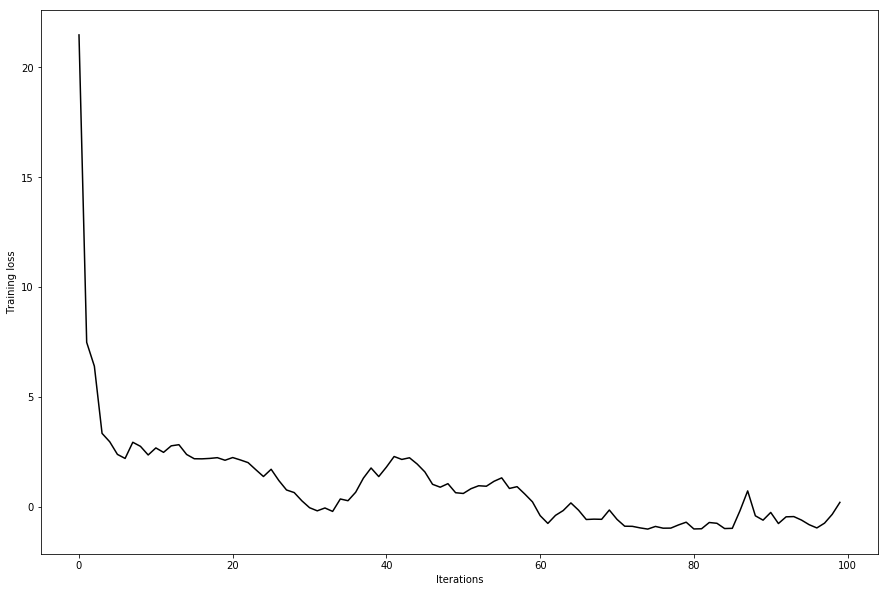

In [14]:
plt.figure(figsize=(15,10))
plt.plot(train_loss, color='black')
plt.xlabel('Iterations');
plt.ylabel('Training loss');

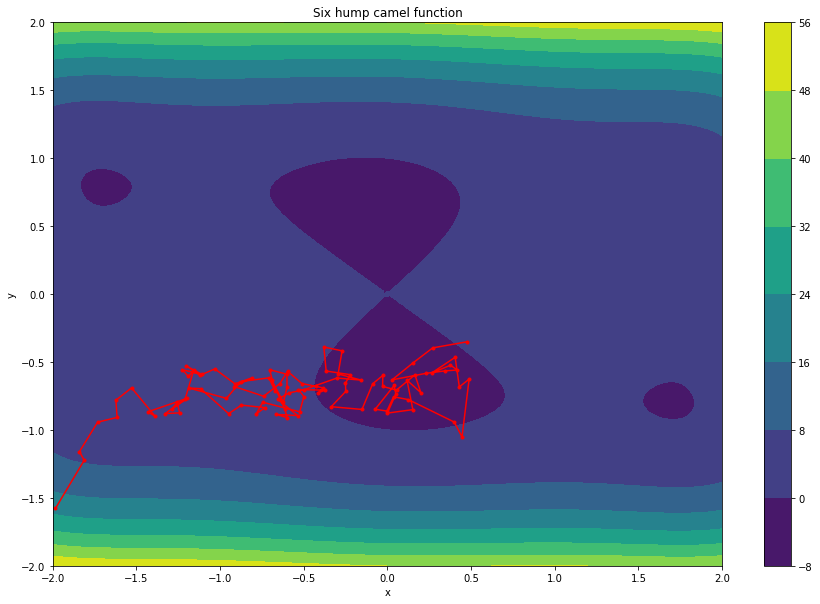

In [15]:
plt.figure(figsize=(15,10))
cp = plt.contourf(A, B, Z)
plt.plot(train_x, train_y, marker='.', color='red')
plt.colorbar(cp)
plt.title('Six hump camel function')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

### Imfluence of beta

In [16]:
lr = 1e-2
nb_iter = 100
list_beta = [100, 1]

In [17]:
train_loss_total = []
train_x_total = []
train_y_total = []

for beta in list_beta:
    print('Beta: ', beta)
    train_loss = np.array([])
    train_x = np.array([])
    train_y = np.array([])
    
    torch.manual_seed(3)
    X = 4*torch.rand(2) - 2
    X.requires_grad = True

    optimizer = SGLD([X], lr, **{'beta':beta})
    for it in range(nb_iter):
        optimizer.zero_grad()
        loss = obj(X[0], X[1])  
        train_loss = np.append(train_loss, loss.detach().numpy())
        train_x = np.append(train_x, X[0].detach().numpy())
        train_y = np.append(train_y, X[1].detach().numpy())

        if it%100 == 0:
            print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))
        loss.backward()
        optimizer.step()
    
    train_loss_total.append(train_loss)
    train_x_total.append(train_x)
    train_y_total.append(train_y)

Beta:  100
It: 0/100 | Loss: 2.148e+01
Beta:  1
It: 0/100 | Loss: 2.148e+01


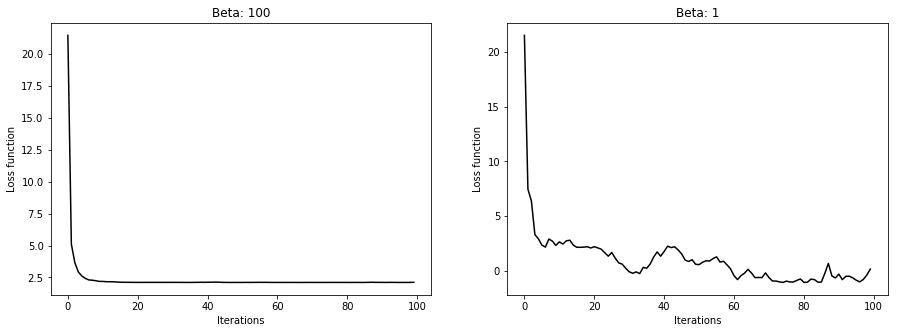

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i, train_loss in enumerate(train_loss_total):
    ax = axs[i]
    ax.plot(train_loss, color='black')
    ax.set_title('Beta: ' + str(list_beta[i]))
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss function')

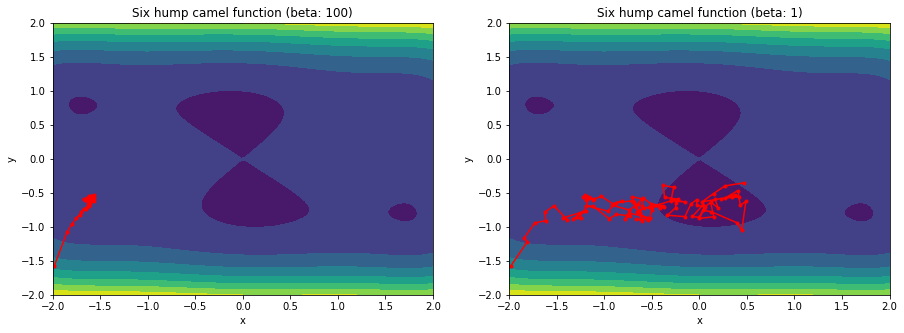

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i in range(len(train_x_total)):
    ax = axs[i]
    cp = ax.contourf(A, B, Z)

    ax.plot(train_x_total[i], train_y_total[i], marker='.', color='red')
    ax.set_title('Six hump camel function (beta: '+str(list_beta[i])+')')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# Implicit scheme

In [20]:
torch.manual_seed(3)
X = 4*torch.rand(2) - 2
X.requires_grad = True

lr = 1e-3
nb_iter = 50
implicit_iter = 4
tau = 1e-2

In [21]:
optimizer = optim.SGD([X], lr)

It: 0/50 | Loss: 2.148e+01


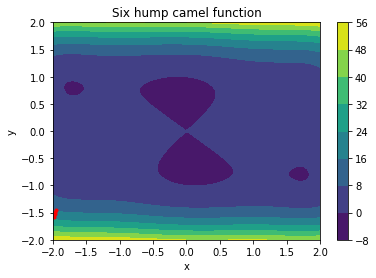

It: 1/50 | Loss: 1.547e+01


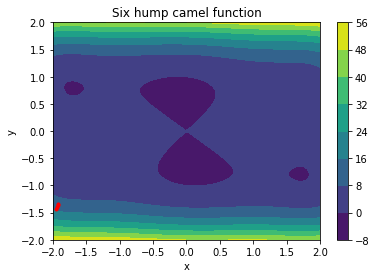

It: 2/50 | Loss: 1.099e+01


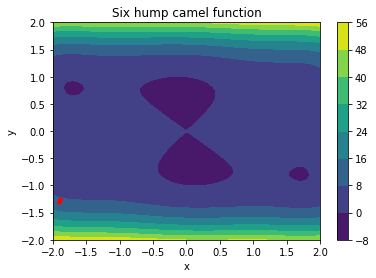

It: 3/50 | Loss: 8.399e+00


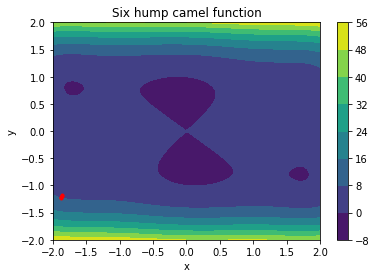

It: 4/50 | Loss: 6.762e+00


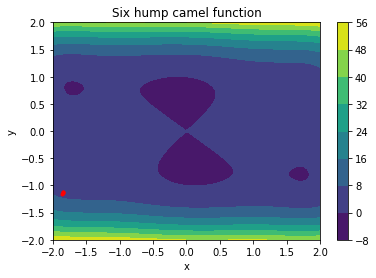

It: 5/50 | Loss: 5.666e+00


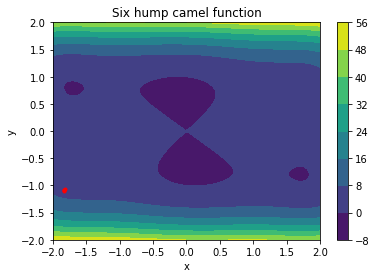

It: 6/50 | Loss: 4.899e+00


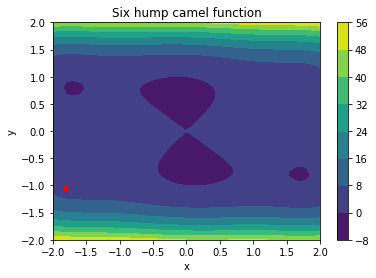

It: 7/50 | Loss: 4.341e+00


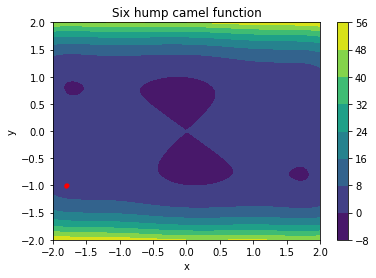

It: 8/50 | Loss: 3.926e+00


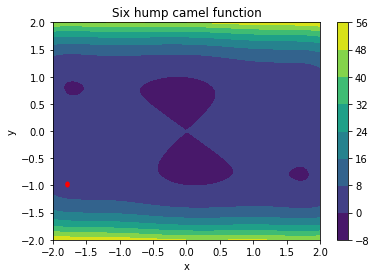

It: 9/50 | Loss: 3.608e+00


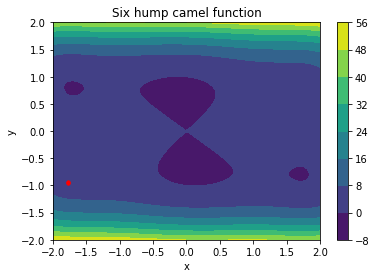

It: 10/50 | Loss: 3.360e+00


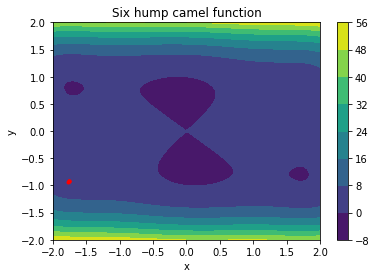

It: 11/50 | Loss: 3.164e+00


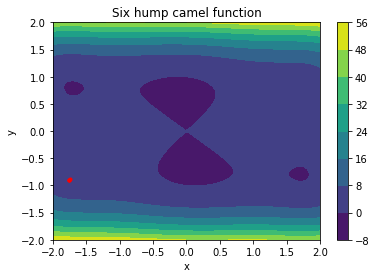

It: 12/50 | Loss: 3.006e+00


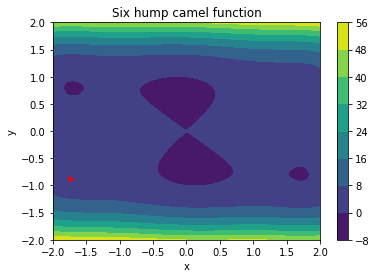

It: 13/50 | Loss: 2.877e+00


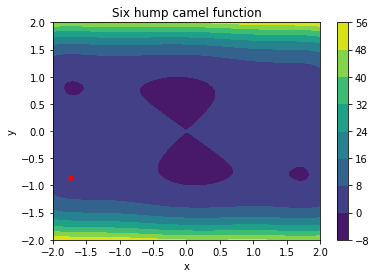

It: 14/50 | Loss: 2.772e+00


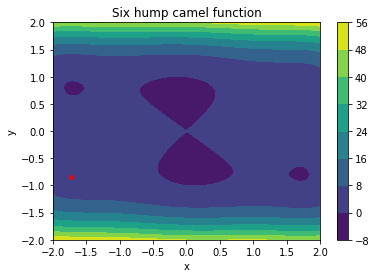

It: 15/50 | Loss: 2.684e+00


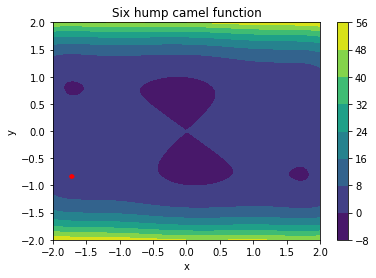

It: 16/50 | Loss: 2.611e+00


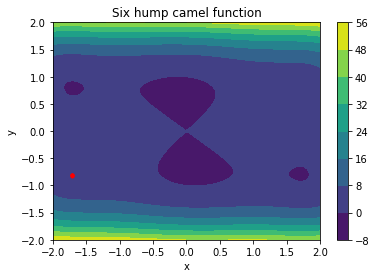

It: 17/50 | Loss: 2.549e+00


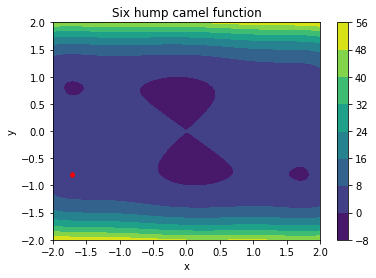

It: 18/50 | Loss: 2.496e+00


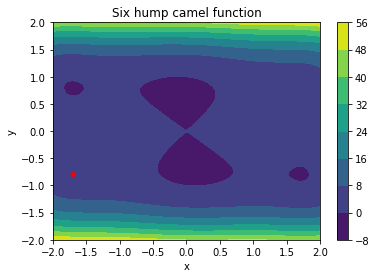

It: 19/50 | Loss: 2.451e+00


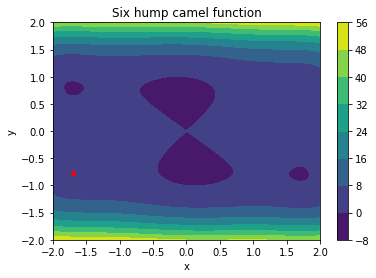

It: 20/50 | Loss: 2.412e+00


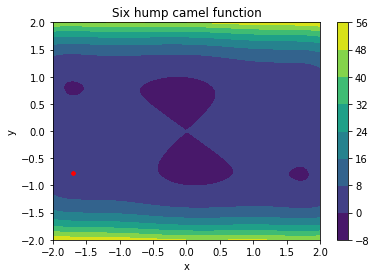

It: 21/50 | Loss: 2.378e+00


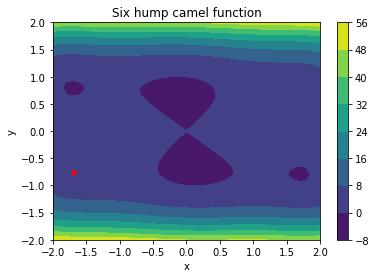

It: 22/50 | Loss: 2.349e+00


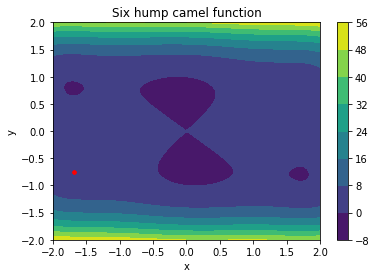

It: 23/50 | Loss: 2.324e+00


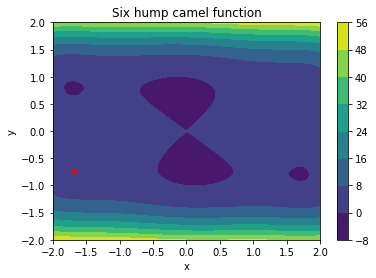

It: 24/50 | Loss: 2.301e+00


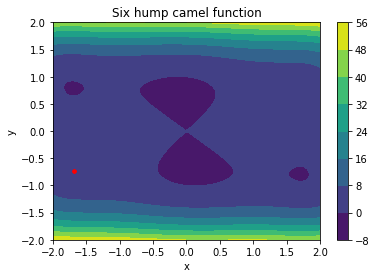

It: 25/50 | Loss: 2.282e+00


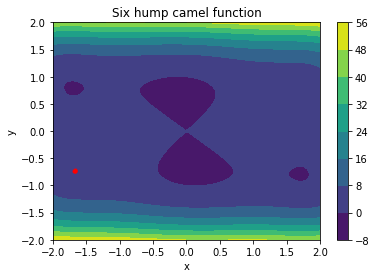

It: 26/50 | Loss: 2.265e+00


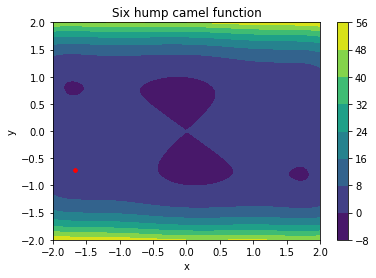

It: 27/50 | Loss: 2.249e+00


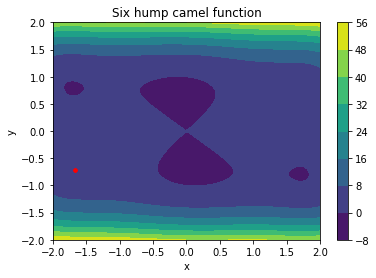

It: 28/50 | Loss: 2.236e+00


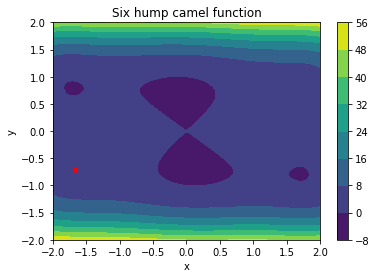

It: 29/50 | Loss: 2.224e+00


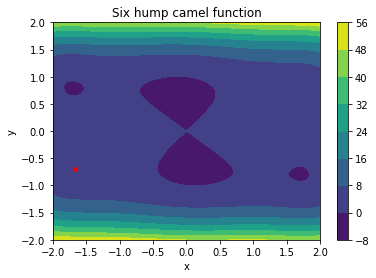

It: 30/50 | Loss: 2.213e+00


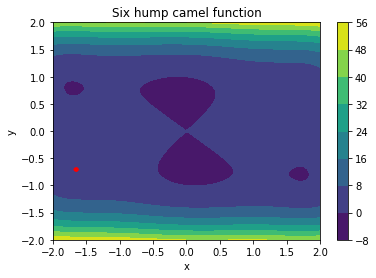

It: 31/50 | Loss: 2.203e+00


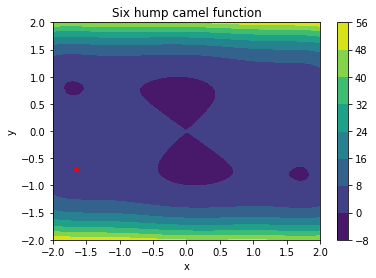

It: 32/50 | Loss: 2.194e+00


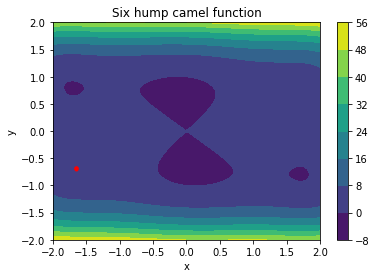

It: 33/50 | Loss: 2.187e+00


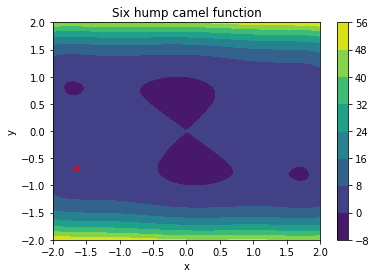

It: 34/50 | Loss: 2.180e+00


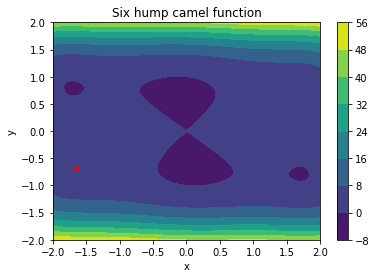

It: 35/50 | Loss: 2.173e+00


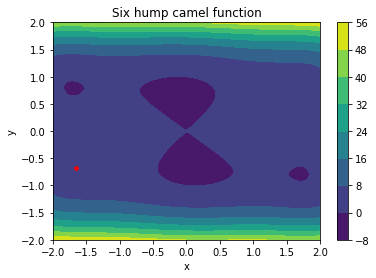

It: 36/50 | Loss: 2.168e+00


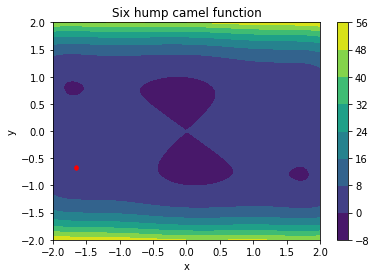

It: 37/50 | Loss: 2.162e+00


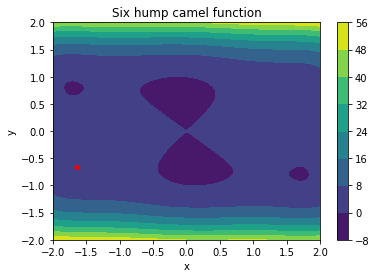

It: 38/50 | Loss: 2.158e+00


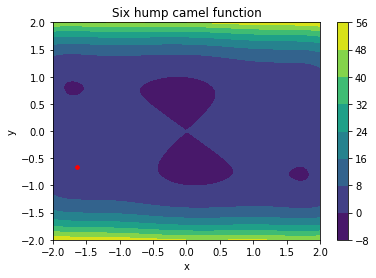

It: 39/50 | Loss: 2.153e+00


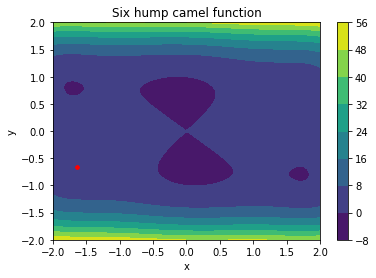

It: 40/50 | Loss: 2.150e+00


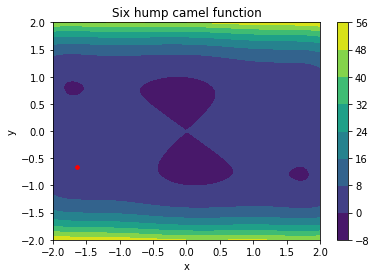

It: 41/50 | Loss: 2.146e+00


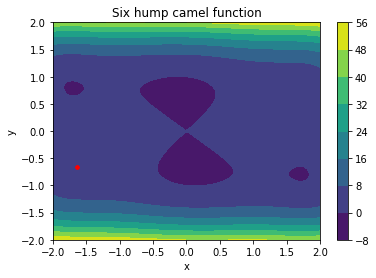

It: 42/50 | Loss: 2.143e+00


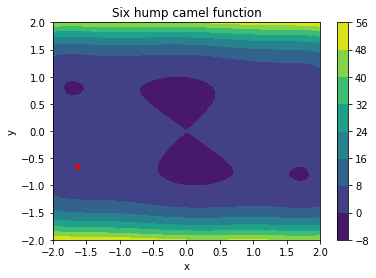

It: 43/50 | Loss: 2.140e+00


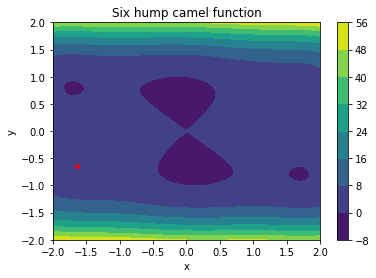

It: 44/50 | Loss: 2.137e+00


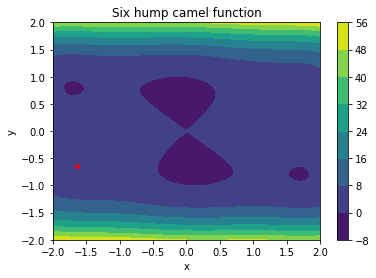

It: 45/50 | Loss: 2.135e+00


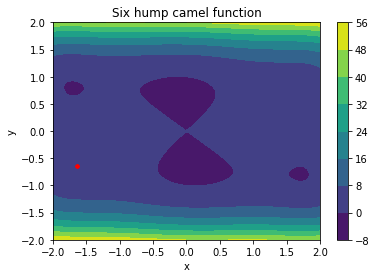

It: 46/50 | Loss: 2.132e+00


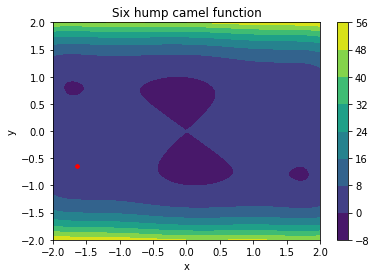

It: 47/50 | Loss: 2.130e+00


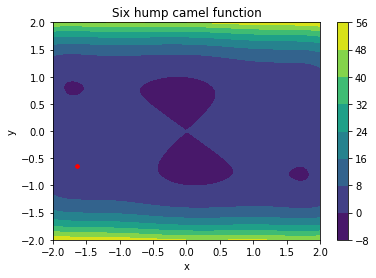

It: 48/50 | Loss: 2.128e+00


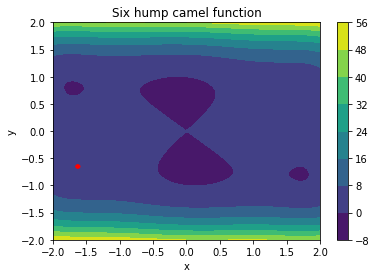

It: 49/50 | Loss: 2.127e+00


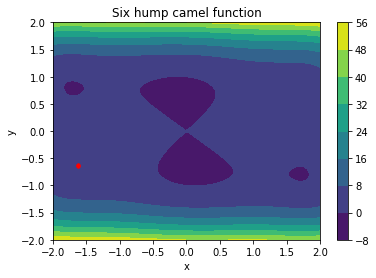

In [22]:
train_loss = np.array([])
train_x = np.array([])
train_y = np.array([])
loss = obj(X[0], X[1])
train_loss = np.append(train_loss, loss.detach().numpy())
train_x = np.append(train_x, X[0].detach().numpy())
train_y = np.append(train_y, X[1].detach().numpy())

for it in range(nb_iter):
    if it%1 == 0:
        print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))

    X_ = copy.deepcopy(X)
    X_.requires_grad = False

    train_loss_inner = np.array([])
    train_x_inner = np.array([])
    train_y_inner = np.array([])

    for inner_it in range(implicit_iter):
        loss = obj(X[0], X[1]) + 1/(2*tau) * torch.norm(X - X_, 2)**2

        train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())
        train_x_inner = np.append(train_x_inner, X[0].detach().numpy())
        train_y_inner = np.append(train_y_inner, X[1].detach().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    cp = plt.contourf(A, B, Z)
    plt.plot(train_x_inner, train_y_inner, marker='.', color='red')
    plt.colorbar(cp)
    plt.title('Six hump camel function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show();    
        
    loss = obj(X[0], X[1]) + 1/(2*tau) * torch.norm(X - X_, 2)**2
    train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_x = np.append(train_x, X[0].detach().numpy())
    train_y = np.append(train_y, X[1].detach().numpy())

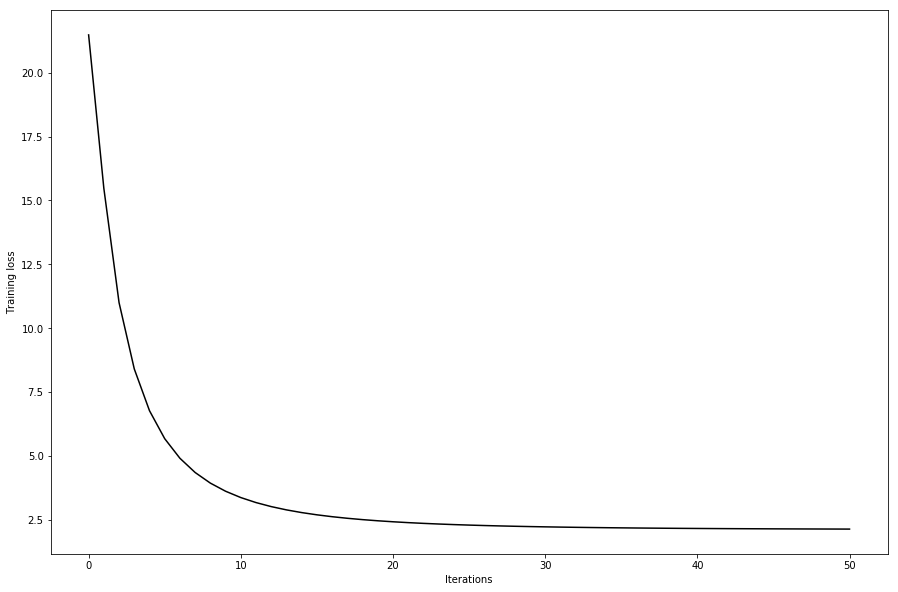

In [23]:
plt.figure(figsize=(15,10))
plt.plot(train_loss, color='black')
plt.xlabel('Iterations');
plt.ylabel('Training loss');

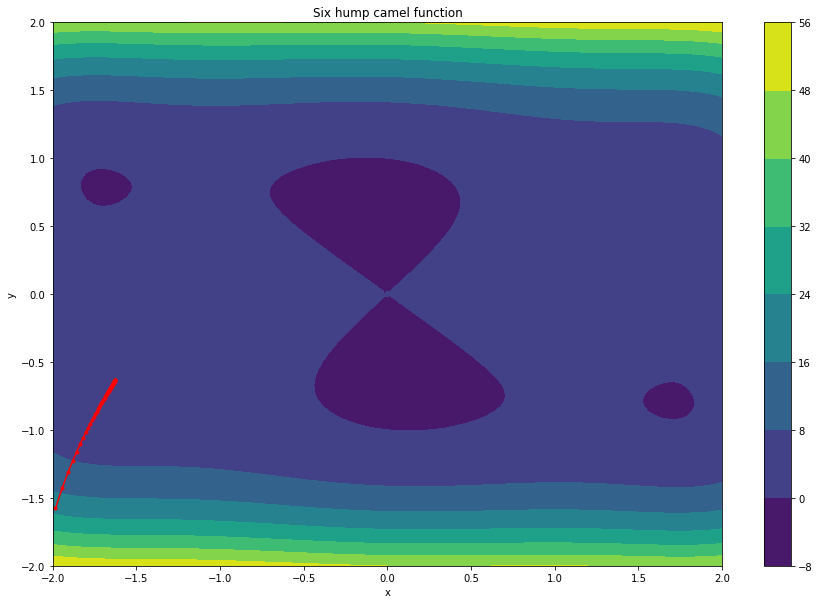

In [24]:
plt.figure(figsize=(15,10))
Z = obj(A, B)
cp = plt.contourf(A, B, Z)
plt.plot(train_x, train_y, marker='.', color='red')
plt.colorbar(cp)
plt.title('Six hump camel function')
plt.xlabel('x')
plt.ylabel('y')
plt.show();

### Influence of tau

In [25]:
lr = 1e-3
nb_iter = 50
implicit_iter = 4
list_tau = [1e-0, 1e-3]

In [26]:
train_loss_total = []
train_x_total = []
train_y_total = []

for tau in list_tau:
    print('Tau: ', tau)
    
    torch.manual_seed(3)
    X = 4*torch.rand(2) - 2
    X.requires_grad = True

    train_loss = np.array([])
    train_x = np.array([])
    train_y = np.array([])
    loss = obj(X[0], X[1])
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_x = np.append(train_x, X[0].detach().numpy())
    train_y = np.append(train_y, X[1].detach().numpy())

    optimizer = optim.SGD([X], lr)
    
    for it in range(nb_iter):
        if it%100 == 0:
            print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))

        X_ = copy.deepcopy(X)
        X_.requires_grad = False

        train_loss_inner = np.array([])

        for inner_it in range(implicit_iter):
            loss = obj(X[0], X[1]) + 1/(2*tau) * torch.norm(X - X_, 2)**2
            
            train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        loss = obj(X[0], X[1]) + 1/(2*tau) * torch.norm(X - X_, 2)**2
        train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())
        train_loss = np.append(train_loss, loss.detach().numpy())
        train_x = np.append(train_x, X[0].detach().numpy())
        train_y = np.append(train_y, X[1].detach().numpy())
    
    train_loss_total.append(train_loss)
    train_x_total.append(train_x)
    train_y_total.append(train_y)

Tau:  1.0
It: 0/50 | Loss: 2.148e+01
Tau:  0.001
It: 0/50 | Loss: 2.148e+01


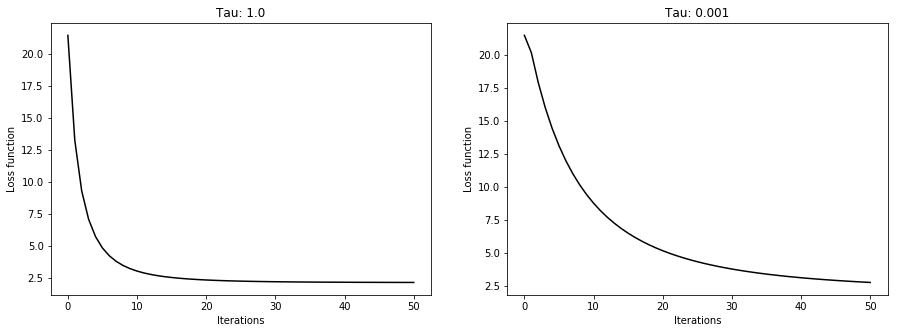

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i, train_loss in enumerate(train_loss_total):
    ax = axs[i]
    ax.plot(train_loss, color='black')
    ax.set_title('Tau: ' + str(list_tau[i]))
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss function')

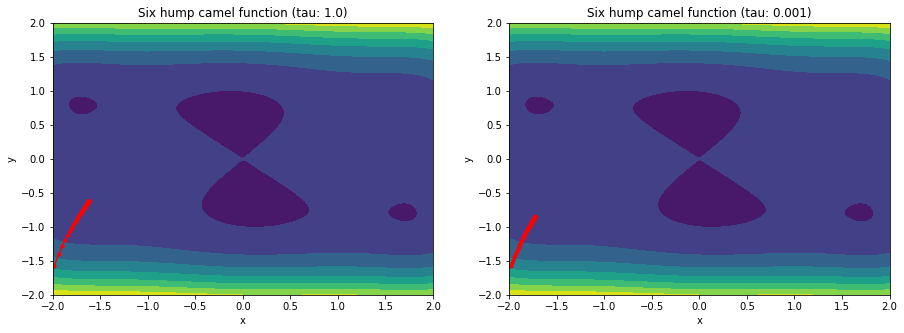

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i in range(len(train_x_total)):
    ax = axs[i]
    cp = ax.contourf(A, B, Z)

    ax.plot(train_x_total[i], train_y_total[i], marker='.', color='red')
    ax.set_title('Six hump camel function (tau: '+str(list_tau[i])+')')
    ax.set_xlabel('x')
    ax.set_ylabel('y')